In [ ]:
###########################################################################
# I would like to acknowledge the authors of these task and images.
# Kaggle problem: https://www.kaggle.com/andrewmvd/face-mask-detection
# Source of the data: https://makeml.app/datasets/mask
###########################################################################

In [1]:
!pip install opencv-python


In [2]:
import os, sys
import pandas as pd
import numpy as np
import cv2

import matplotlib as mpl
import matplotlib.pyplot as plt

# 1. Import data

In [3]:
face_list = np.load(r'C:\Users\vigne\OneDrive\Desktop\adv_ds_project\face_list_pca.npy')
face_list.shape

(4072, 100, 100)

In [4]:
# Import combined_df from FeatureEngineering
combined_df = pd.read_csv(r"C:\Users\vigne\OneDrive\Desktop\adv_ds_project\combined_df_pca.csv",index_col=[0])
combined_df.head()

,Filename,ImgDim,Bndbox,ClassStr,label,0,1,2
0,C:/Users/vk/Desktop/adv_ds_project/annotations...,"[512, 366]","[79, 109, 105, 142]",without_mask,2,0.0,0.0,1.0
1,C:/Users/vk/Desktop/adv_ds_project/annotations...,"[512, 366]","[185, 226, 100, 144]",with_mask,1,0.0,1.0,0.0
2,C:/Users/vk/Desktop/adv_ds_project/annotations...,"[512, 366]","[325, 360, 90, 141]",without_mask,2,0.0,0.0,1.0
3,C:/Users/vk/Desktop/adv_ds_project/annotations...,"[400, 156]","[321, 354, 34, 69]",with_mask,1,0.0,1.0,0.0
4,C:/Users/vk/Desktop/adv_ds_project/annotations...,"[400, 156]","[224, 261, 38, 73]",with_mask,1,0.0,1.0,0.0


# 2. Train test split data

In [5]:
# Reshape image data from 3 dimensions to 2 dimensions
size=face_list.shape[1]
X = np.reshape(face_list, (face_list.shape[0],size*size))
Y = combined_df['label']

In [6]:
X.shape

(4072, 10000)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = train_test_split(X, Y, test_size=0.1, random_state=0)

In [8]:
print('Training face_list and label sizes: \n{}, {}'.format(x_train.shape,y_train.shape))
print('Test face_list and label sizes: \n{}, {}'.format(x_validate.shape,y_validate.shape))

Training face_list and label sizes: 
(3664, 10000), (3664,)
Test face_list and label sizes: 
(408, 10000), (408,)


# 3. RandomForest - Gridsearch

In [17]:
## Import classifiers and performance metrics
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

#Hyperparameters that are tuned for gridsearch
param_grid = { 
    'n_estimators': [50,100],
    'max_depth' : [3,4,5]
}
rfc=RandomForestClassifier(class_weight = {0:0.9,1:0.01,2:0.06}, random_state=0)
#rfc=RandomForestClassifier(class_weight = 'balanced', random_state=0)

rf_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rf_cv.fit(x_train, y_train)




GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.9, 1: 0.01,
                                                            2: 0.06},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                

In [18]:
rf_cv.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [33]:

rf_model = RandomForestClassifier(class_weight = {0:0.9,1:0.01,2:0.06}, n_estimators = 100,max_depth = 5, random_state=0)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.9, 1: 0.01, 2: 0.06},
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
## View the accuracy score
print('Best score for training data:', rf_cv.best_score_,"\n") 

## View the best parameters for the model found using grid search
print('Best C:',rf_cv.best_estimator_.n_estimators,"\n") 
print('Best Gamma:',rf_cv.best_estimator_.max_depth,"\n")



Best score for training data: 0.666749416649893 

Best C: 100 

Best Gamma: 5 



In [35]:
y_pred_train = rf_model.predict(x_train)
print("Classification report for rf model %s:\n%s\n"
      % (rf_model, metrics.classification_report(y_train, y_pred_train)))

Classification report for rf model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.9, 1: 0.01, 2: 0.06},
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.15      0.99      0.26       111
           1       0.99      0.66      0.79      2908
           2       0.56      0.87      0.68       645

    accuracy                           0.71      3664
   macro avg       0.57      0.84      0.58      3664
weighted avg       0.89      0.71      0.76      366

# 4. Predict

In [36]:
y_pred = rf_model.predict(x_validate)

# 5. Evaluation - Confusion Matrix

In [37]:
# Compare predicted and expected values
print("Classification report for rf_model %s:\n%s\n"
      % (rf_model, metrics.classification_report(y_validate, y_pred)))

Classification report for rf_model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.9, 1: 0.01, 2: 0.06},
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.07      0.50      0.12        12
           1       0.96      0.58      0.72       324
           2       0.42      0.74      0.53        72

    accuracy                           0.61       408
   macro avg       0.48      0.61      0.46       408
weighted avg       0.84      0.61      0.67       40

In [38]:
# 0 = mask worn wrongly 1 = with mask  2 = without mask

### Visualization - True Positives v.s. False Positives

In [39]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_validate, y_pred)
cf #cf[actu][pred]
# pred 0 1 2
# actu
# 0
# 1
# 2

array([[  6,   1,   5],
       [ 67, 188,  69],
       [ 12,   7,  53]], dtype=int64)

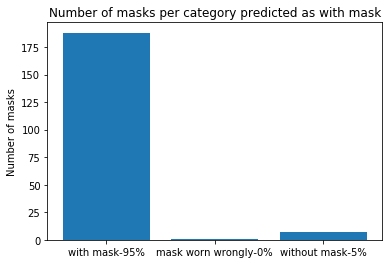

In [40]:
# segregate images with actual labels = 1 when prediction = 1 
img_with_mask1 = cf[1][1]
# segregate images with actual labels = 0 when prediction = 1 
img_worn_wrongly1 = cf[0][1]
# segregate images with actual labels = 2 when prediction = 1 
img_without_mask1 = cf[2][1]

# Find % of images predicted to be 1
t1 = img_with_mask1 + img_worn_wrongly1 + img_without_mask1
p1 = int(img_with_mask1/t1*100)
p0 = int(img_worn_wrongly1/t1*100)
p2 = 100-p1-p0


plt.bar(["with mask-"+str(p1)+"%","mask worn wrongly-"+str(p0)+"%","without mask-"+str(p2)+"%"],[img_with_mask1,img_worn_wrongly1,img_without_mask1])
plt.title("Number of masks per category predicted as with mask")
plt.ylabel("Number of masks")
plt.show()

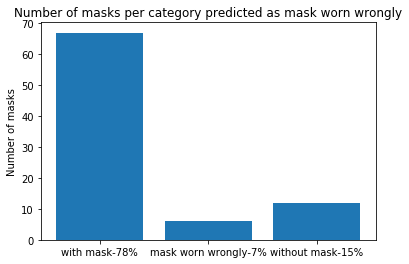

In [41]:
# segregate images with actual labels = 1 when prediction = 0 
img_with_mask0 = cf[1][0]
# segregate images with actual labels = 0 when prediction = 0 
img_worn_wrongly0 = cf[0][0]
# segregate images with actual labels = 2 when prediction = 0 
img_without_mask0 = cf[2][0]

# Find % of images predicted to be 0
t0 = img_with_mask0 + img_worn_wrongly0 + img_without_mask0
p1 = int(img_with_mask0/t0*100)
p0 = int(img_worn_wrongly0/t0*100)
p2 = 100-p1-p0


plt.bar(["with mask-"+str(p1)+"%","mask worn wrongly-"+str(p0)+"%","without mask-"+str(p2)+"%"],[img_with_mask0,img_worn_wrongly0,img_without_mask0])
plt.title("Number of masks per category predicted as mask worn wrongly")
plt.ylabel("Number of masks")
plt.show()

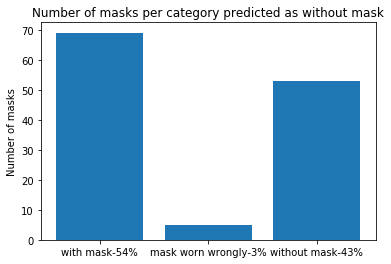

In [42]:

# segregate images with actual labels = 1 when prediction = 2
img_with_mask2 = cf[1][2]
# segregate images with actual labels = 0 when prediction = 2 
img_worn_wrongly2 = cf[0][2]
# segregate images with actual labels = 2 when prediction = 2 
img_without_mask2 = cf[2][2]

# Find % of images predicted to be 2
t2 = img_with_mask2 + img_worn_wrongly2 + img_without_mask2
p1 = int(img_with_mask2/t2*100)
p0 = int(img_worn_wrongly2/t2*100)
p2 = 100-p1-p0


plt.bar(["with mask-"+str(p1)+"%","mask worn wrongly-"+str(p0)+"%","without mask-"+str(p2)+"%"],[img_with_mask2,img_worn_wrongly2,img_without_mask2])
plt.title("Number of masks per category predicted as without mask")
plt.ylabel("Number of masks")
plt.show()

### Visualization - True Positives v.s. False Negatives

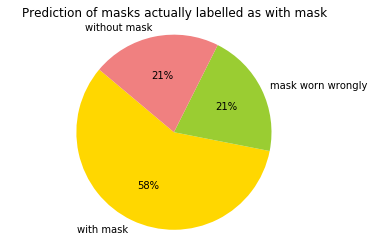

In [43]:
# Prediction of images with actuals labels = 1 (with mask)

# Data to plot
pred_labels = ['with mask', 'mask worn wrongly', 'without mask']
sizes = [img_with_mask1, img_with_mask0, img_with_mask2]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=pred_labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=140)
plt.title("Prediction of masks actually labelled as with mask")

plt.axis('equal')
plt.show()

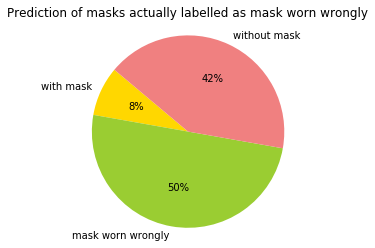

In [44]:
# Prediction of images with actuals labels = 0 (mask worn wrongly)

# Data to plot
pred_labels = ['with mask', 'mask worn wrongly', 'without mask']
sizes = [img_worn_wrongly1, img_worn_wrongly0, img_worn_wrongly2]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=pred_labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=140)
plt.title("Prediction of masks actually labelled as mask worn wrongly")

plt.axis('equal')
plt.show()

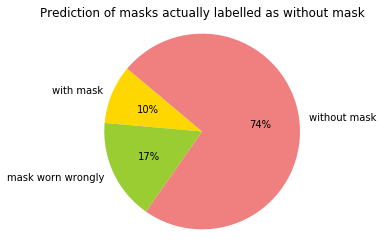

In [45]:
# Prediction of images with actuals labels = 2 (mask worn wrongly)

# Data to plot
pred_labels = ['with mask', 'mask worn wrongly', 'without mask']
sizes = [img_without_mask1, img_without_mask0, img_without_mask2]
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=pred_labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=140)
plt.title("Prediction of masks actually labelled as without mask")

plt.axis('equal')
plt.show()

# 6. Save models

In [46]:
import pickle as pk
pk.dump(rf_model, open(r"C:\Users\vigne\OneDrive\Desktop\adv_ds_project\rf_model.pkl","wb"))
